In [1]:
%pylab inline
import pandas as pd
import math
import statsmodels.formula.api as sm
import numpy as np
from fractions import Fraction
import csv
from procedure import scott
import fms

Populating the interactive namespace from numpy and matplotlib


# Importing data and filtering out m,s with exceptions

In [7]:
fms_df = pd.read_csv('data/bigrun.csv')
# exps_df = fms_df[fms_df['types'] != "None"]
# exps_df.head(10)

# Analayzing by V

In [29]:
V_map = {}
V_map_m_s = {}
for i, row in fms_df.iterrows():
    V = math.ceil(2 * row['m'] / row['s'])
    ans = Fraction(int(row['ans'].split('/')[0]), int(row['ans'].split('/')[1]))
    if V not in V_map:
        V_map[V] = ans
        V_map_m_s[V] = (row['m'], row['s'])
    elif ans < V_map[V]:
        V_map[V] = ans
        V_map_m_s[V] = (row['m'], row['s'])

In [3]:
#V_map_m_s

In [3]:
result_map = {}
for i, row in fms_df.iterrows():
    m = row['m']
    s = row['s']
    ans = Fraction(int(row['ans'].split('/')[0]), int(row['ans'].split('/')[1]))
    result_map[(m, s)] = ans

In [8]:
with open('data/k.csv', 'w') as csv_file:
    for a in range(1,20):
        for d in range(1,20):
#             X_s = {}
            k = 1
            m = 3 * d * k + a + d
            s = 3 * d * k + a
            ans = max(Fraction(1,3), scott.f(m, s, True))
            X = ans * (3 * d * k + a) - d * k
            for k in range(2,5):
                m_k = 3 * d * k + a + d
                s_k = 3 * d * k + a
                ans_k = max(Fraction(1,3), scott.f(m_k, s_k, True))
                X_k = ans_k * (3 * d * k + a) - d * k
                if X != X_k:
                    print(m_k, s_k, m, s, ans, ans_k)
                
                
                
            

In [38]:
with open('data/k.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['a','d','X_0(a,d)','X_1(a,d)','X_2(a,d)','m','s'])
    for a in range(1,20):
        for d in range(1,20):
            X_s = {}
            for k in range(0,3):
                m = 3 * d * k + a + d
                s = 3 * d * k + a
                if (m,s) in result_map:
                    ans = result_map[(m,s)]
                    X_s[k] = ans * (3 * d * k + a) - d * k
            if 2 in X_s:
                if 0 not in X_s and X_s[1] != X_s[2]:
                    csv_writer.writerow([a, d, 'x', X_s[1], X_s[2], m, s])
                elif 1 not in X_s and X_s[0] != X_s[2]:
                    csv_writer.writerow([a, d, X_s[0], 'x', X_s[2], m, s])
                elif 0  in X_s and 1 in X_s and (X_s[0] != X_s[2] or X_s[1] != X_s[2]):
                    csv_writer.writerow([a, d, X_s[0], X_s[1], X_s[2], m, s])

In [25]:
with open('data/k.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['a','d','X_0(a,d)','X_1(a,d)','X_2(a,d)','m','s'])
    for a in range(1,20):
        for d in range(1,20):
            k = 2
            m = 3 * d * k + a + d
            s = 3 * d * k + a
            if (m,s) in result_map:
                ans = result_map[(m,s)]
                X = ans * (3 * d * k + a) - d * k
                for k in range(3,10):
                    m_k = 3 * d * k + a + d
                    s_k = 3 * d * k + a
                    if (m_k,s_k) in result_map:
                        ans = result_map[(m_k,s_k)]
                        X_k = ans * (3 * d * k + a) - d * k
                        if X_k != X:
                            print(m, s, m_k, s_k, a, d, k, X, X_k)
                            print(result_map[(m, s)])
                            print(result_map[(m_k, s_k)])

39 34 54 49 4 5 3 5/3 4/3
35/102
1/3


In [9]:
wrongs = []
with open('data/scott_wrong.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['m','s','scott','not-scott','methods'])
    for s in range(3, 61):
        for m in range(s + 1, 70 + 1):
            if (m,s) in result_map:
                if scott.f(m,s,True) != result_map[(m,s)][0] and scott.f(m,s,True) >= Fraction(1,3):
                    wrongs.append([m, s, scott.f(m,s,True), result_map[(m,s)]])
                    csv_writer.writerow([m, s, scott.f(m,s,True), result_map[(m,s)][0], result_map[(m,s)][1]])
    #                 print(m, s, scottsimple.f(m,s), result_map[(m,s)])
print(len(wrongs))
print(len(result_map))

60
1356


In [8]:
result_map = {}
for i, row in fms_df.iterrows():
    m = row['m']
    s = row['s']
    ans = Fraction(int(row['ans'].split('/')[0]), int(row['ans'].split('/')[1]))
    ans_type = row['type']
    result_map[(m, s)] = ans, ans_type

In [4]:
with open('data/GAPS.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['m','s','a','b'])
    for s in range(3, 61):
        for m in range(s + 1, 70 + 1):
            if (m, s) in result_map:
                V, _, _ = fms.calcSv(m,s)
                ans, ans_type = result_map[(m,s)]
                if 'GAP' in ans_type:
                    csv_writer.writerow([m, s, ans.numerator, ans.denominator])

In [5]:
with open('data/V3.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['m','s','a','b'])
    for s in range(3, 61):
        for m in range(s + 1, 70 + 1):
            if (m, s) in result_map:
                V, _, _ = fms.calcSv(m,s)
                ans, ans_type = result_map[(m,s)]
                if V == 3:
                    csv_writer.writerow([m, s, ans.numerator, ans.denominator])

# Plotting all of the exceptions, with s on the x-axis and m on the y-axis.

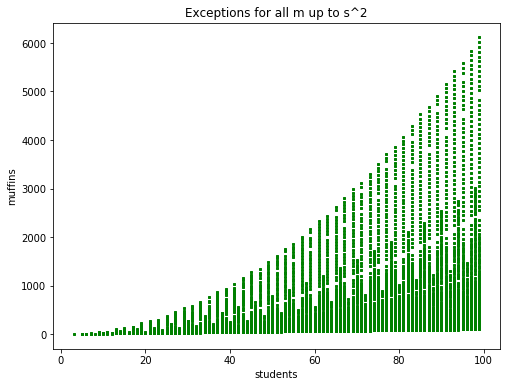

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(exps_df['s'], exps_df['m'],'gs', markersize=2, )

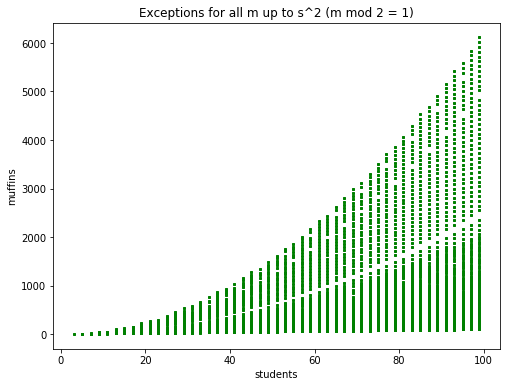

In [5]:
exps_df_mod1 = exps_df[exps_df['s'] % 2 == 1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2 (m mod 2 = 1)')
ax.plot(exps_df_mod1['s'], exps_df_mod1['m'],'gs', markersize=2, )

In [6]:
exps_df_mod1_max = exps_df_mod1[exps_df_mod1['m'] == max(exps_df_mod1['m'])]
s_dfs_max = []
s_df_max = []
for s in range(3, 100):
    s_df = exps_df_mod1[exps_df_mod1['s'] == s]
    if (not s_df.empty):
        s_df_max = s_df[s_df['m'] == max(s_df['m'])]
        s_dfs_max.append(s_df_max)
exps_df_mod1_maxes = pd.concat(s_dfs_max)
exps_df_mod1_maxes.head()

,m,s,ans,exp_type
0,4,3,1/3,FC
6,11,5,13/30,DK-TWO
27,19,7,25/56,DK-TWO
89,47,9,37/78,DKp-TWO
158,52,11,83/176,DK-TWO


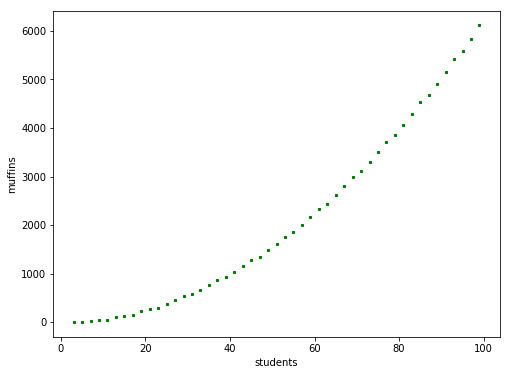

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
ax.plot(exps_df_mod1_maxes['s'], exps_df_mod1_maxes['m'],'gs', markersize=2, )

In [8]:
import statsmodels.formula.api as sm
import numpy as np

In [9]:
s_list = exps_df_mod1_maxes['s'].values.tolist()
m_list = exps_df_mod1_maxes['m'].values.tolist()
data = {'m': m_list, 's': s_list}
model = sm.ols(formula = 'm ~ np.power(s, 2) + s', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.795e+05
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.13e-94
Time:                        16:23:06   Log-Likelihood:                -207.78
No. Observations:                  49   AIC:                             421.6
Df Residuals:                      46   BIC:                             427.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.3098      8.064     -1.

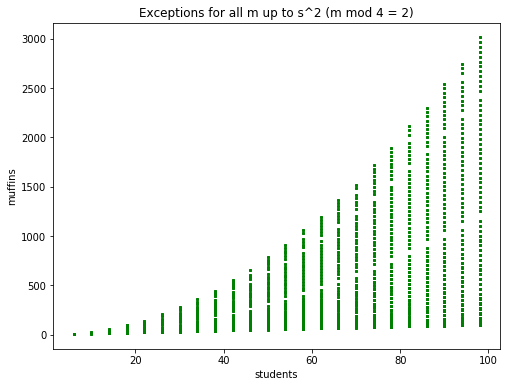

In [10]:
exps_df_mod2 = exps_df[exps_df['s'] % 4 == 2]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2 (m mod 4 = 2)')
ax.plot(exps_df_mod2['s'], exps_df_mod2['m'],'gs', markersize=2, )

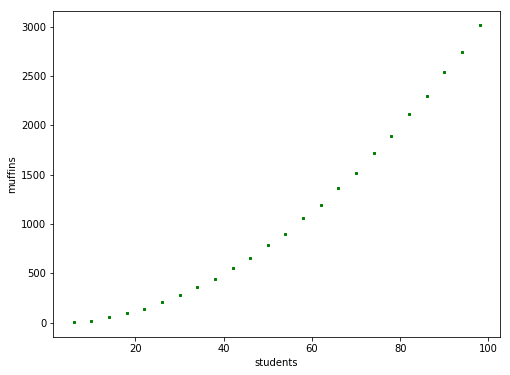

In [11]:
exps_df_mod2_max = exps_df_mod2[exps_df_mod2['m'] == max(exps_df_mod2['m'])]
s_dfs_max = []
s_df_max = []
for s in range(3, 100):
    s_df = exps_df_mod2[exps_df_mod2['s'] == s]
    if (not s_df.empty):
        s_df_max = s_df[s_df['m'] == max(s_df['m'])]
        s_dfs_max.append(s_df_max)
exps_df_mod2_maxes = pd.concat(s_dfs_max)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
ax.plot(exps_df_mod2_maxes['s'], exps_df_mod2_maxes['m'],'gs', markersize=2, )

In [12]:
s_list = exps_df_mod2_maxes['s'].values.tolist()
m_list = exps_df_mod2_maxes['m'].values.tolist()
data = {'m': m_list, 's': s_list}
model2 = sm.ols(formula = 'm ~ np.power(s, 2) + s', data = data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.463e+05
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           3.06e-44
Time:                        16:23:07   Log-Likelihood:                -83.502
No. Observations:                  24   AIC:                             173.0
Df Residuals:                      21   BIC:                             176.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.3302      6.068     -0.

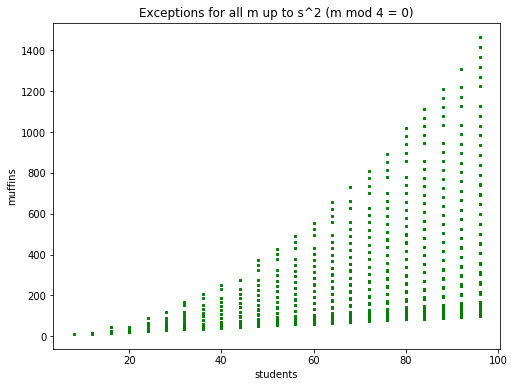

In [13]:
exps_df_mod0 = exps_df[exps_df['s'] % 4 == 0]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2 (m mod 4 = 0)')
ax.plot(exps_df_mod0['s'], exps_df_mod0['m'],'gs', markersize=2)

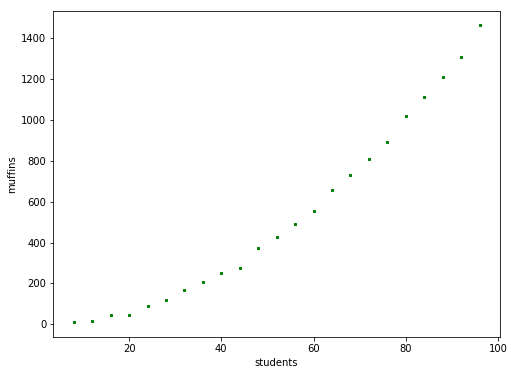

In [14]:
exps_df_mod0_max = exps_df_mod0[exps_df_mod0['m'] == max(exps_df_mod0['m'])]
s_dfs_max = []
s_df_max = []
for s in range(3, 100):
    s_df = exps_df_mod0[exps_df_mod0['s'] == s]
    if (not s_df.empty):
        s_df_max = s_df[s_df['m'] == max(s_df['m'])]
        s_dfs_max.append(s_df_max)
exps_df_mod0_maxes = pd.concat(s_dfs_max)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
ax.plot(exps_df_mod0_maxes['s'], exps_df_mod0_maxes['m'],'gs', markersize=2, )

In [15]:
s_list = exps_df_mod0_maxes['s'].values.tolist()
m_list = exps_df_mod0_maxes['m'].values.tolist()
data = {'m': m_list, 's': s_list}
model0 = sm.ols(formula = 'm ~ np.power(s, 2) + s', data = data).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.665e+04
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           6.07e-33
Time:                        16:23:08   Log-Likelihood:                -87.625
No. Observations:                  23   AIC:                             181.2
Df Residuals:                      20   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.1640      9.455     -0.

Text(0,0.5,u'number of exceptions')

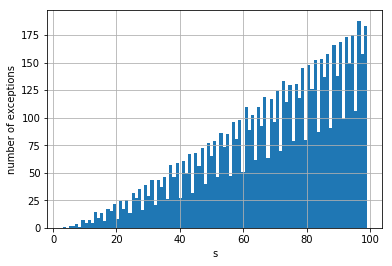

In [16]:
ax = exps_df['s'].hist(bins=97)
ax.set_xlabel("s")
ax.set_ylabel("number of exceptions")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0bbc8b50>,
      dtype=object)

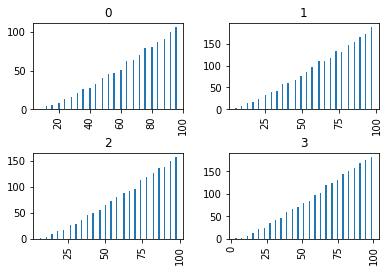

In [17]:
exps_df['s'].hist(by=exps_df['s'] % 4, bins=97)

In [18]:
s_freq_map = {}
for index, row in exps_df_mod1.iterrows():
    if row['s'] in s_freq_map:
        s_freq_map[row['s']] += 1
    else:
        s_freq_map[row['s']] = 1
s_freq_map

{3: 1,
 5: 2,
 7: 3,
 9: 7,
 11: 7,
 13: 14,
 15: 13,
 17: 17,
 19: 22,
 21: 24,
 23: 25,
 25: 32,
 27: 35,
 29: 39,
 31: 43,
 33: 43,
 35: 46,
 37: 57,
 39: 59,
 41: 61,
 43: 67,
 45: 68,
 47: 72,
 49: 77,
 51: 79,
 53: 86,
 55: 85,
 57: 96,
 59: 98,
 61: 110,
 63: 102,
 65: 110,
 67: 119,
 69: 117,
 71: 124,
 73: 133,
 75: 130,
 77: 131,
 79: 145,
 81: 148,
 83: 152,
 85: 153,
 87: 158,
 89: 166,
 91: 169,
 93: 173,
 95: 175,
 97: 188,
 99: 183}

In [19]:
s_freq_data_set = {'s': s_freq_map.keys(), 'freq': s_freq_map.values()}
model1_freq = sm.ols(formula = 'freq ~ s', data = s_freq_data_set).fit()
print(model1_freq.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7116.
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           5.82e-53
Time:                        16:23:12   Log-Likelihood:                -144.31
No. Observations:                  49   AIC:                             292.6
Df Residuals:                      47   BIC:                             296.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0829      1.384    -12.347      0.0

In [20]:
s_freq_map_2 = {}
for index, row in exps_df_mod2.iterrows():
    if row['s'] in s_freq_map_2:
        s_freq_map_2[row['s']] += 1
    else:
        s_freq_map_2[row['s']] = 1

s_freq_data_set_2 = {'s': s_freq_map_2.keys(), 'freq': s_freq_map_2.values()}
model2_freq = sm.ols(formula = 'freq ~ s', data = s_freq_data_set_2).fit()
print(model2_freq.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2781.
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.17e-24
Time:                        16:23:12   Log-Likelihood:                -69.059
No. Observations:                  24   AIC:                             142.1
Df Residuals:                      22   BIC:                             144.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.7492      1.950     -9.613      0.0

In [21]:
s_freq_map_0 = {}
for index, row in exps_df_mod0.iterrows():
    if row['s'] in s_freq_map_0:
        s_freq_map_0[row['s']] += 1
    else:
        s_freq_map_0[row['s']] = 1

s_freq_data_set_0 = {'s': s_freq_map_0.keys(), 'freq': s_freq_map_0.values()}
model0_freq = sm.ols(formula = 'freq ~ s', data = s_freq_data_set_0).fit()
print(model0_freq.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1733.
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.15e-21
Time:                        16:23:13   Log-Likelihood:                -61.643
No. Observations:                  23   AIC:                             127.3
Df Residuals:                      21   BIC:                             129.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.1028      1.695     -9.502      0.0

Text(0,0.5,u'number of exceptions')

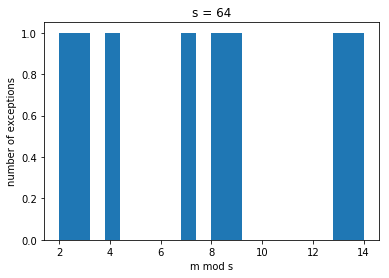

In [22]:
s = 20
s_df = exps_df[exps_df['s'] == s]

fig, ax = plt.subplots()
ax.hist(s_df['m'] % s, bins=s)
ax.set_title("s = 64")
ax.set_xlabel("m mod s")
ax.set_ylabel("number of exceptions")

In [23]:
maps_list = []
for s in range(3, 100):
    s_df = exps_df[exps_df['s'] == s]
    num_mods_list = []
    for mod_n in range(0, s):
        mod_df = s_df[s_df['m'] % s == mod_n]
        num_mods = len(mod_df)
        num_mods_list.append(num_mods)
    max_num = max(num_mods_list)
    max_map = {'s': s, 'max_m': num_mods_list.index(max_num), 'num_at_max_m': max_num}
    maps_list.append(max_map)
    
    if max_num != 0:
        num_mods_list.remove(max_num)
        max_num = max(num_mods_list)
        max_map = {'s': s, 'max_m': num_mods_list.index(max_num), 'num_at_max_m': max_num}
    maps_list.append(max_map)
#     print("s=%d, m=%d, num_mods=%d" % (s, num_mods_list.index(max_num), max_num))

max_mods_df = pd.DataFrame(maps_list)
# max_mods_df = max_mods_df.set_index('s')
max_mods_df.head(15)

,max_m,num_at_max_m,s
0,1,1,3
1,0,0,3
2,0,0,4
3,0,0,4
4,1,1,5
5,1,1,5
6,1,1,6
7,1,1,6
8,1,1,7
9,2,1,7


Text(0,0.5,u'Top 2 m mod s')

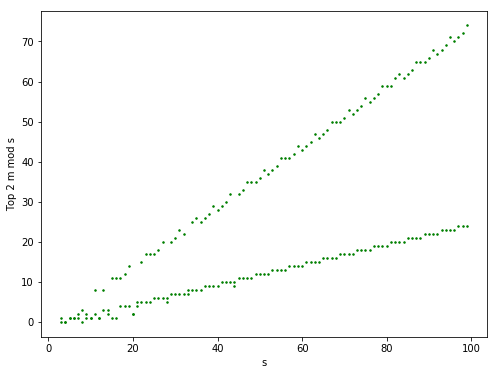

In [24]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(max_mods_df['s'], max_mods_df['max_m'],'gs', markersize=3, marker = ".")
ax.set_xlabel("s")
ax.set_ylabel("Top 2 m mod s")

Text(0,0.5,u'Top 2 m mod s')

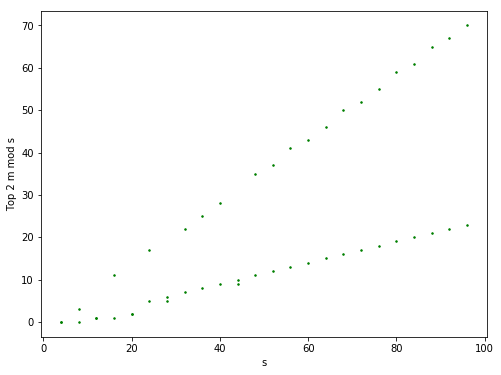

In [25]:
max_mods_df0 = max_mods_df[max_mods_df['s'] % 4 == 0]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(max_mods_df0['s'], max_mods_df0['max_m'],'gs', markersize=3, marker = ".")
ax.set_xlabel("s")
ax.set_ylabel("Top 2 m mod s")

In [26]:
m_mod_small_0 = {}
m_mod_large_0 = {}
for index, row in max_mods_df0.iterrows():
    if row['s'] > 20:
        if row['max_m'] < 0.5 * row['s']:
            if row['s'] in m_mod_small_0 and row['max_m'] > m_mod_small_0[row['s']]:
                m_mod_small_0[row['s']] = row['max_m']
            elif row['s'] not in m_mod_small_0:
                m_mod_small_0[row['s']] = row['max_m']
        else:
            m_mod_large_0[row['s']] = row['max_m']

In [27]:
m_mod_small_data_0 = {'s': m_mod_small_0.keys(), 'max_m': m_mod_small_0.values()}
model0_mod_small = sm.ols(formula = 'max_m ~ s', data = m_mod_small_data_0).fit()
print(model0_mod_small.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.762e+31
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          1.40e-256
Time:                        16:23:21   Log-Likelihood:                 597.31
No. Observations:                  19   AIC:                            -1191.
Df Residuals:                      17   BIC:                            -1189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0000    3.8e-15  -2.63e+14      0.0

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [28]:
m_mod_large_data_0 = {'s': m_mod_large_0.keys(), 'max_m': m_mod_large_0.values()}
model0_mod_large = sm.ols(formula = 'max_m ~ s', data = m_mod_large_data_0).fit()
print(model0_mod_large.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           2.77e-24
Time:                        16:23:21   Log-Likelihood:                -11.522
No. Observations:                  17   AIC:                             27.04
Df Residuals:                      15   BIC:                             28.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5415      0.383     -4.021      0.0

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


Text(0.5,1,u's mod 4 = 1')

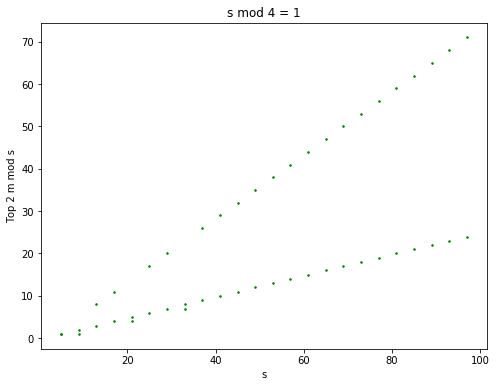

In [29]:
max_mods_df1 = max_mods_df[max_mods_df['s'] % 4 == 1]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(max_mods_df1['s'], max_mods_df1['max_m'],'gs', markersize=3, marker = ".")
ax.set_xlabel("s")
ax.set_ylabel("Top 2 m mod s")
ax.set_title("s mod 4 = 1")

In [30]:
m_mod_small_1 = {}
m_mod_large_1 = {}
for index, row in max_mods_df1.iterrows():
    if row['s'] > 0:
        if row['max_m'] < 0.5 * row['s']:
            if row['s'] in m_mod_small_1 and row['max_m'] > m_mod_small_1[row['s']]:
                m_mod_small_1[row['s']] = row['max_m']
            elif row['s'] not in m_mod_small_1:
                m_mod_small_1[row['s']] = row['max_m']
        else:
            m_mod_large_1[row['s']] = row['max_m']
            
m_mod_small_data_1 = {'s': m_mod_small_1.keys(), 'max_m': m_mod_small_1.values()}
model1_mod_small = sm.ols(formula = 'max_m ~ s', data = m_mod_small_data_1).fit()
print(model1_mod_small.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.574e+31
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:23:22   Log-Likelihood:                 766.09
No. Observations:                  24   AIC:                            -1528.
Df Residuals:                      22   BIC:                            -1526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2500   1.48e-15  -1.69e+14      0.0

In [31]:
m_mod_large_data_1 = {'s': m_mod_large_1.keys(), 'max_m': m_mod_large_1.values()}
model1_mod_large = sm.ols(formula = 'max_m ~ s', data = m_mod_large_data_1).fit()
print(model1_mod_large.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.255e+31
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          2.44e-272
Time:                        16:23:22   Log-Likelihood:                 606.13
No. Observations:                  20   AIC:                            -1208.
Df Residuals:                      18   BIC:                            -1206.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7500   9.94e-15  -1.76e+14      0.0

Text(0,0.5,u'Top 2 m mod s')

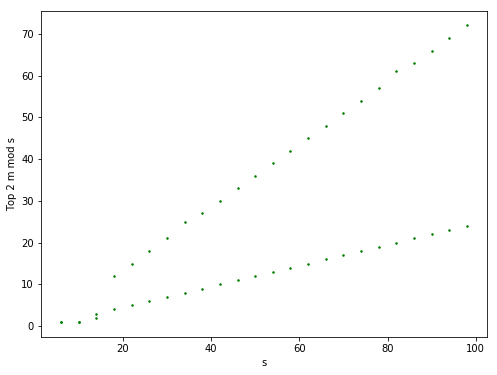

In [32]:
max_mods_df2 = max_mods_df[max_mods_df['s'] % 4 == 2]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(max_mods_df2['s'], max_mods_df2['max_m'],'gs', markersize=3, marker = ".")
ax.set_xlabel("s")
ax.set_ylabel("Top 2 m mod s")

In [33]:
m_mod_small_2 = {}
m_mod_large_2 = {}
for index, row in max_mods_df2.iterrows():
    if row['s'] > 10:
        if row['max_m'] < 0.5 * row['s']:
            if row['s'] in m_mod_small_2 and row['max_m'] > m_mod_small_2[row['s']]:
                m_mod_small_2[row['s']] = row['max_m']
            elif row['s'] not in m_mod_small_2:
                m_mod_small_2[row['s']] = row['max_m']
        else:
            m_mod_large_2[row['s']] = row['max_m']
            
m_mod_small_data_2 = {'s': m_mod_small_2.keys(), 'max_m': m_mod_small_2.values()}
model2_mod_small = sm.ols(formula = 'max_m ~ s', data = m_mod_small_data_2).fit()
print(model2_mod_small.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.468e+32
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          5.69e-315
Time:                        16:23:22   Log-Likelihood:                 722.16
No. Observations:                  22   AIC:                            -1440.
Df Residuals:                      20   BIC:                            -1438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5000   7.27e-16  -6.88e+14      0.0

In [34]:
m_mod_large_data_2 = {'s': m_mod_large_2.keys(), 'max_m': m_mod_large_2.values()}
model2_mod_large = sm.ols(formula = 'max_m ~ s', data = m_mod_large_data_2).fit()
print(model2_mod_large.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.277e+04
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.64e-35
Time:                        16:23:22   Log-Likelihood:                -4.0574
No. Observations:                  21   AIC:                             12.11
Df Residuals:                      19   BIC:                             14.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4048      0.175     -8.038      0.0

Text(0,0.5,u'Top 2 m mod s')

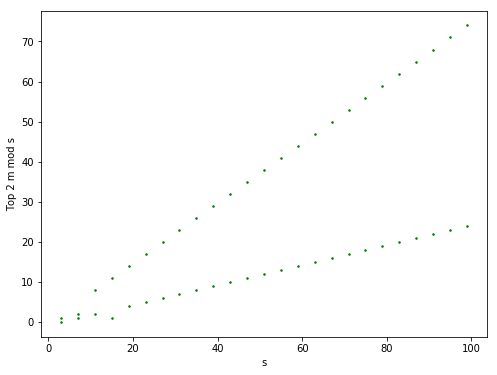

In [35]:
max_mods_df3 = max_mods_df[max_mods_df['s'] % 4 == 3]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(max_mods_df3['s'], max_mods_df3['max_m'],'gs', markersize=3, marker = ".")
ax.set_xlabel("s")
ax.set_ylabel("Top 2 m mod s")

In [36]:
m_mod_small_3 = {}
m_mod_large_3 = {}
for index, row in max_mods_df3.iterrows():
    if row['s'] > 16:
        if row['max_m'] < 0.5 * row['s']:
            if row['s'] in m_mod_small_3 and row['max_m'] > m_mod_small_3[row['s']]:
                m_mod_small_3[row['s']] = row['max_m']
            elif row['s'] not in m_mod_small_3:
                m_mod_small_3[row['s']] = row['max_m']
        else:
            m_mod_large_3[row['s']] = row['max_m']
            
m_mod_small_data_3 = {'s': m_mod_small_3.keys(), 'max_m': m_mod_small_3.values()}
model3_mod_small = sm.ols(formula = 'max_m ~ s', data = m_mod_small_data_3).fit()
print(model3_mod_small.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.636e+33
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          3.77e-309
Time:                        16:23:22   Log-Likelihood:                 715.42
No. Observations:                  21   AIC:                            -1427.
Df Residuals:                      19   BIC:                            -1425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7500   2.34e-16   -3.2e+15      0.0

In [37]:
m_mod_large_data_3 = {'s': m_mod_large_3.keys(), 'max_m': m_mod_large_3.values()}
model3_mod_large = sm.ols(formula = 'max_m ~ s', data = m_mod_large_data_3).fit()
print(model3_mod_large.summary())

                            OLS Regression Results                            
Dep. Variable:                  max_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.440e+31
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          6.42e-289
Time:                        16:23:22   Log-Likelihood:                 640.86
No. Observations:                  21   AIC:                            -1278.
Df Residuals:                      19   BIC:                            -1276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2500   8.16e-15  -3.07e+13      0.0

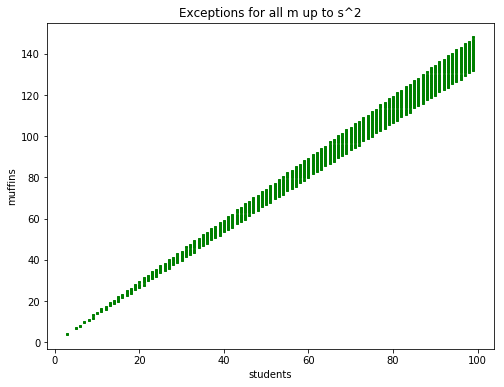

In [38]:
fc_exps = exps_df[exps_df['exp_type'] == 'FC']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(fc_exps['s'], fc_exps['m'],'gs', markersize=2, )

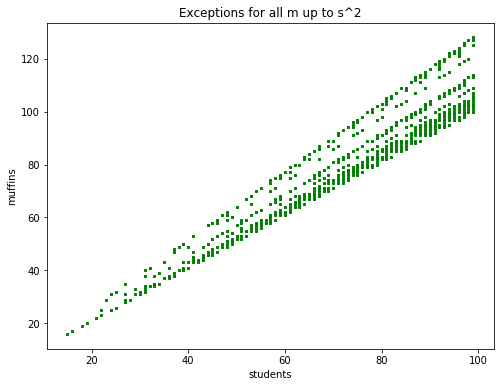

In [39]:
bm_exps = exps_df[exps_df['exp_type'] == 'BM']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(bm_exps['s'], bm_exps['m'],'gs', markersize=2, )

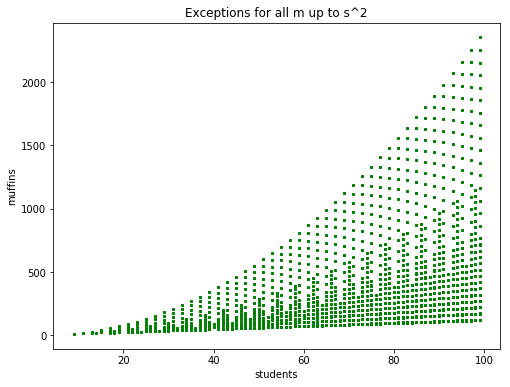

In [40]:
dk1_exps = exps_df[exps_df['exp_type'] == 'DK-ONE']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(dk1_exps['s'], dk1_exps['m'],'gs', markersize=2, )

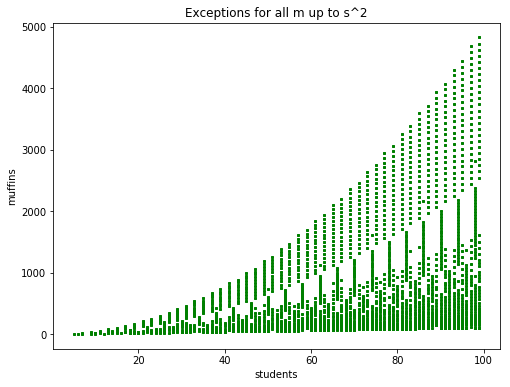

In [41]:
dk2_exps = exps_df[exps_df['exp_type'] == 'DK-TWO']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(dk2_exps['s'], dk2_exps['m'],'gs', markersize=2, )

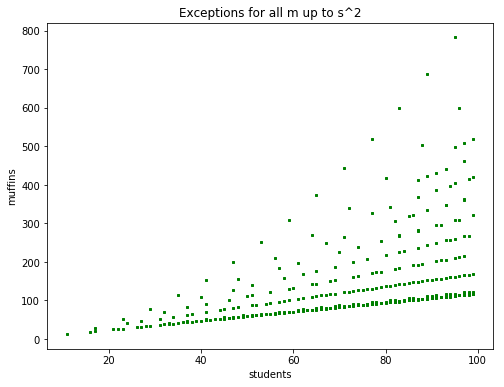

In [42]:
dkp1_exps = exps_df[exps_df['exp_type'] == 'DKp-ONE']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(dkp1_exps['s'], dkp1_exps['m'],'gs', markersize=2, )

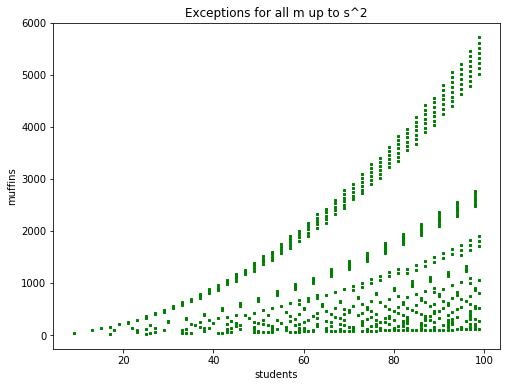

In [43]:
dkp2_exps = exps_df[exps_df['exp_type'] == 'DKp-TWO']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(dkp2_exps['s'], dkp2_exps['m'],'gs', markersize=2, )

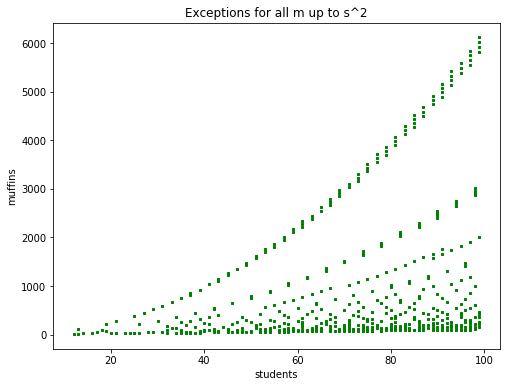

In [44]:
half1_exps = exps_df[exps_df['exp_type'] == 'HALF-ONE']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(half1_exps['s'], half1_exps['m'],'gs', markersize=2, )

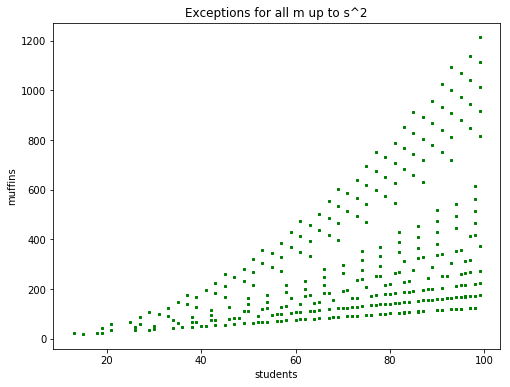

In [45]:
half2_exps = exps_df[exps_df['exp_type'] == 'HALF-TWO']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Exceptions for all m up to s^2')
ax.plot(half2_exps['s'], half2_exps['m'],'gs', markersize=2, )

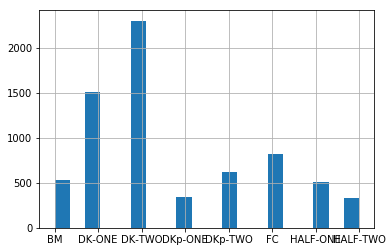

In [46]:
exps_df['exp_type'].hist(bins = 20)

In [44]:
max_2ba_s = {}
for index, row in exps_df.iterrows():
    b = int(row['ans'].split('/')[1])
    a = int(row['ans'].split('/')[0])
    _2ba = b - 2 * a
    if row['s'] not in max_2ba_s:
        max_2ba_s[row['s']] = _2ba
    elif _2ba > max_2ba_s[row['s']]:
        max_2ba_s[row['s']] = _2ba
        
max_2ba_s[15]

16

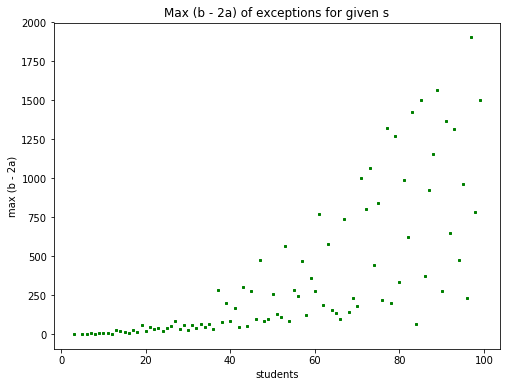

In [47]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('max (b - 2a)')
plt.title('Max (b - 2a) of exceptions for given s')
ax.plot(max_2ba_s.keys(), max_2ba_s.values(),'gs', markersize=2)

In [61]:
max_2ba_s_data = {'s': max_2ba_s.keys(), 'max_2ba': max_2ba_s.values()}
model_max_2ba_s = sm.ols(formula = 'max_2ba ~ np.power(s, 2) + s', data = max_2ba_s_data).fit()
print(model_max_2ba_s.summary())

                            OLS Regression Results                            
Dep. Variable:                max_2ba   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     67.14
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           8.99e-19
Time:                        18:17:17   Log-Likelihood:                -681.34
No. Observations:                  96   AIC:                             1369.
Df Residuals:                      93   BIC:                             1376.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.6133    104.564      0.

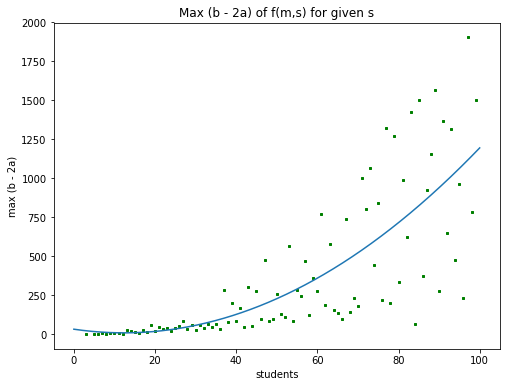

In [65]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('max (b - 2a)')
plt.title('Max (b - 2a) of f(m,s) for given s')
ax.plot(max_2ba_s.keys(), max_2ba_s.values(),'gs', markersize=2)

x = numpy.linspace(0,100,1000) # 100 linearly spaced numbers
ax.plot(x, 0.1543 * np.square(x) - 3.8001 * x + 31.6133)

In [67]:
max_2ba_m = {}
for index, row in exps_df.iterrows():
    b = int(row['ans'].split('/')[1])
    a = int(row['ans'].split('/')[0])
    _2ba = b - 2 * a
    if row['m'] not in max_2ba_m:
        max_2ba_m[row['m']] = _2ba
    elif _2ba > max_2ba_m[row['m']]:
        max_2ba_m[row['m']] = _2ba
        


8

In [73]:
max_2ba_m[105]

98

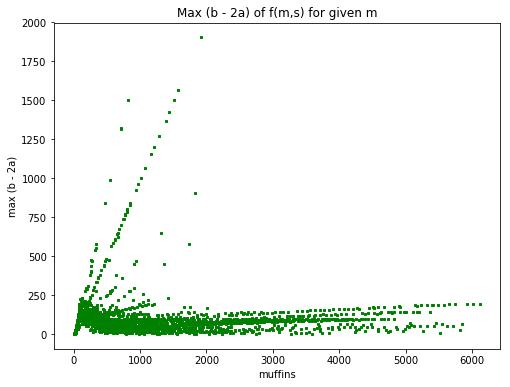

In [81]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('muffins')
plt.ylabel('max (b - 2a)')
plt.title('Max (b - 2a) of f(m,s) for given m')
ax.plot(max_2ba_m.keys(), max_2ba_m.values(),'gs', markersize=2)

In [70]:
max_2ba_m_data = {'m': max_2ba_m.keys(), 'max_2ba': max_2ba_m.values()}
model_max_2ba_m = sm.ols(formula = 'max_2ba ~ m', data = max_2ba_m_data).fit()
print(model_max_2ba_m.summary())

                            OLS Regression Results                            
Dep. Variable:                max_2ba   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     10.40
Date:                Tue, 11 Sep 2018   Prob (F-statistic):            0.00128
Time:                        20:33:51   Log-Likelihood:                -11546.
No. Observations:                1798   AIC:                         2.310e+04
Df Residuals:                    1796   BIC:                         2.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.6710      5.282     22.655      0.0

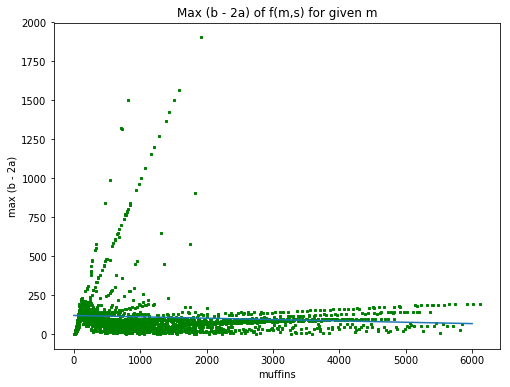

In [82]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('muffins')
plt.ylabel('max (b - 2a)')
plt.title('Max (b - 2a) of f(m,s) for given m')
ax.plot(max_2ba_m.keys(), max_2ba_m.values(),'gs', markersize=2)

x = numpy.linspace(0,6000,60000) # 100 linearly spaced numbers
ax.plot(x, -0.0087 * x + 119.6710)

In [74]:
_2ba_s = []
ms = []
ss = []
for index, row in exps_df.iterrows():
    b = int(row['ans'].split('/')[1])
    a = int(row['ans'].split('/')[0])
    _2ba = b - 2 * a
    _2ba_s.append(_2ba / 15)
    ms.append(row['m'])
    ss.append(row['s'])
_2ba_s[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

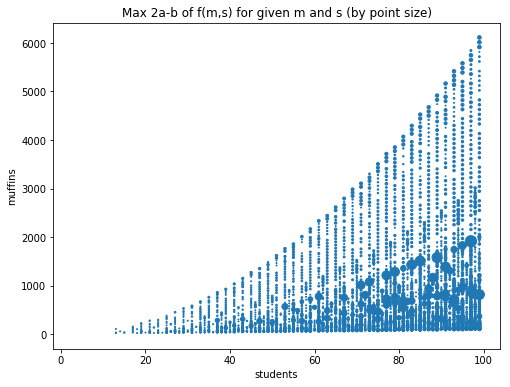

In [83]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.xlabel('students')
plt.ylabel('muffins')
plt.title('Max 2a-b of f(m,s) for given m and s (by point size)')

plt.scatter(ss, ms, s = _2ba_s)
plt.show()

In [80]:
max_2ba_m_s_data = {'m': ms, 's': ss, 'max_2ba': _2ba_s}
model_max_2ba_m_s = sm.ols(formula = 'max_2ba ~ m * s + m + s', data = max_2ba_m_s_data).fit()
print(model_max_2ba_m_s.summary())

                            OLS Regression Results                            
Dep. Variable:                max_2ba   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     143.2
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           4.73e-90
Time:                        20:55:34   Log-Likelihood:                -21953.
No. Observations:                6968   AIC:                         4.391e+04
Df Residuals:                    6964   BIC:                         4.394e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7932      0.264     -3.003      0.0